# BUSINESS ANALYTICS OF A BIBYCLES COMPANY

# 1. Introduction

## Report goal
There is fictional cycling company that sells bicycles in different countries around the world. They would like to increase their revenue and improve their business. To do this, they provided a dataset with all their transactions in the years 2013-2014. This dataset includes product-level information about sales, profits, market segments, and geographic distribution.

The main idea is to use these details to gain new insights to create or improve the marketing and sales strategy.

Specifically, it will be analyze:
- the sales trends over time using a line chart to highlight seasonality or trends;
- the sales difference across regions using a heat map or bar chart;
- the top-selling products using visualization charts (pie chart or bar chart);
- the relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression.

## Database description
The database is composed by 700 rows and 16 columns, each row is a sale made:
| Name                | Type       | Description                                        |  Non-Null Count | 
|---------------------|------------|----------------------------------------------------|-----------------|
| Segment             | object     | Market segment to which the sale belongs           | 700 non-null    |
| Country             | object     | Country where the sale was made                    | 700 non-null    | 
| Product             | object     | Type of product sold in the sale                   | 700 non-null    | 
| Discount band       | object     | Discount band size applied in the sale             | 700 non-null    |
| Unit sold           | int64      | Quantity of unit sold in the sale                  | 700 non-null    |
| Manufactoring price | int64      | The production price per unit for the product sold | 700 non-null    |
| Sale price          | int64      | The sale price per unit for the product sold       | 700 non-null    |
| Gross sales         | int64      | Total amount of sales before any discounts         | 700 non-null    |
| Discounts           | int64      | Amount of discount applied                         | 700 non-null    |
| Sales               | int64      | The sale after the discount                        | 700 non-null    |
| COGS                | object     | Cost of Goods Sold                                 | 700 non-null    |
| Profit              | int64      | Profit made, the difference between sales and COGS | 700 non-null    |
| Date                | datetime64 | The date the sale was made                         | 700 non-null    |
| Month number        | int64      | The month name of the sale                         | 700 non-null    |
| Month name          | object     | The month number of the sale                       | 700 non-null    |
| Year                | int64      | The year of the sale                               | 700 non-null    |



#### Packages

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
from xgboost import XGBRegressor
import os
import kagglehub
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import certifi
import matplotlib.colors as mcolors

c:\Users\matza\FinalProject\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Loading of the dataset already cleaned

In [2]:
df = pd.read_csv('datasetCleaned.csv')

In [3]:
# copy of the dataset
df_copy = df.copy(deep=True)

In [4]:
# number or rows and columns
df.shape

(700, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Segment              700 non-null    object
 1   Country              700 non-null    object
 2   Product              700 non-null    object
 3   Discount Band        700 non-null    object
 4   Units Sold           700 non-null    int64 
 5   Manufacturing Price  700 non-null    int64 
 6   Sale Price           700 non-null    int64 
 7   Gross Sales          700 non-null    int64 
 8   Discounts            700 non-null    int64 
 9   Sales                700 non-null    int64 
 10  COGS                 700 non-null    int64 
 11  Profit               700 non-null    int64 
 12  Date                 700 non-null    object
 13  Month Number         700 non-null    int64 
 14  Month Name           700 non-null    object
 15  Year                 700 non-null    int64 
dtypes: int64

In [6]:
df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618,3,20,32370,0,32370,16185,16185,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321,3,20,26420,0,26420,13210,13210,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178,3,15,32670,0,32670,21780,10890,2014-06-01,6,June,2014


# 3. Exploratory Data Analysis

In [7]:
# set Date column as index
df = df.set_index("Date")

In [8]:
df = df.drop(["Month Number", "Month Name", "Year"], axis=1)

Descriptive statistics

- categorical variables

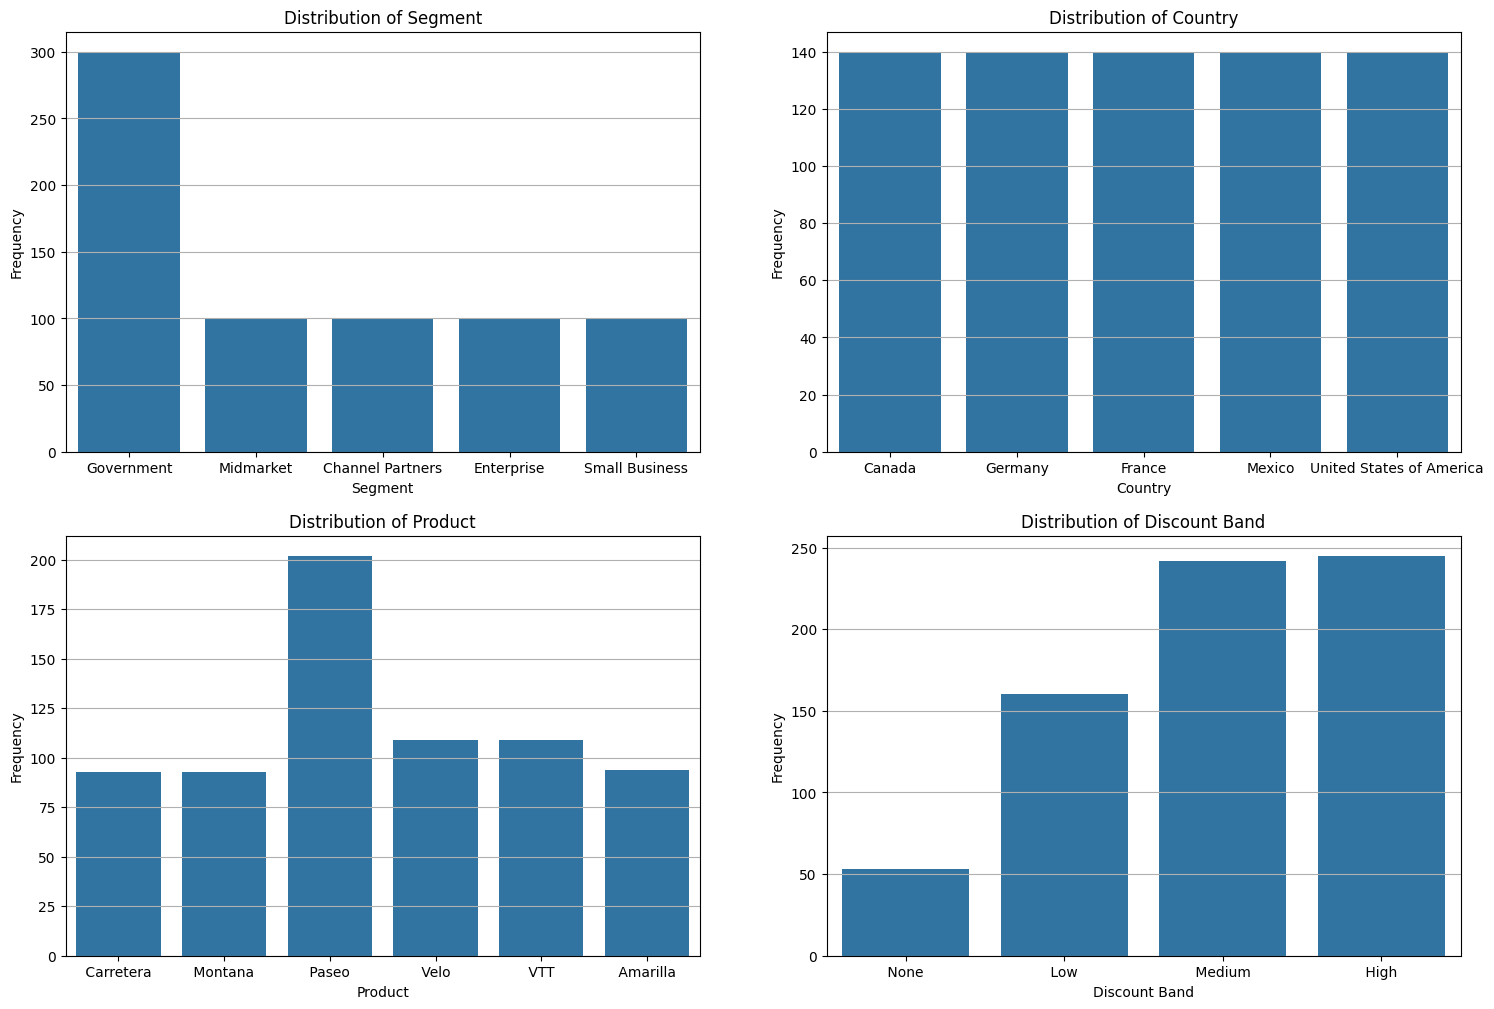

In [9]:
# selection of the categorical variables
categorical_columns = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

# barplot for the categorical vars
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

In [10]:
# percentage table
def percentageTable(col): 
    percentage = round(df[col].value_counts(normalize=True)*100, 2)
    
    table = pd.DataFrame({
        'Category': percentage.index,
        'Percentage (%)': percentage.values
        })
    print(f"Variable {col}")
    print(table.to_string(index=False))
    print("\n")

In [11]:
# Segment
percentageTable('Segment')

Variable Segment
        Category  Percentage (%)
      Government           42.86
       Midmarket           14.29
Channel Partners           14.29
      Enterprise           14.29
  Small Business           14.29




In [12]:
# Country
percentageTable('Country')

Variable Country
                Category  Percentage (%)
                  Canada            20.0
                 Germany            20.0
                  France            20.0
                  Mexico            20.0
United States of America            20.0




In [13]:
# Product
percentageTable('Product')

Variable Product
   Category  Percentage (%)
     Paseo            28.86
      Velo            15.57
       VTT            15.57
  Amarilla            13.43
   Montana            13.29
 Carretera            13.29




In [14]:
# Discount Band
percentageTable('Discount Band')

Variable Discount Band
Category  Percentage (%)
   High            35.00
 Medium            34.57
    Low            22.86
   None             7.57




- quantitative variables

In [15]:
# selection of the quantitative variables
numerical_columns = df.select_dtypes(include='number').columns

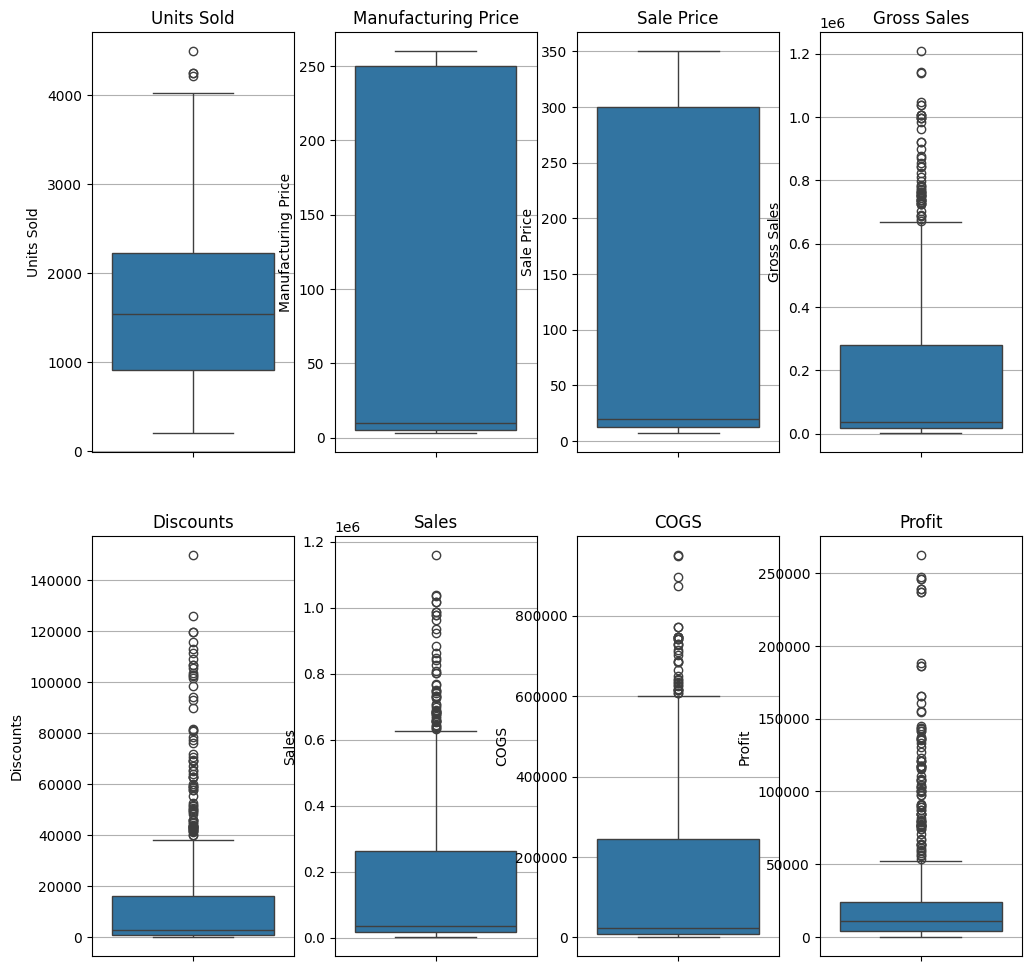

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.ravel()

#  boxlot of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Boxplot per la variabile corrente
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y')

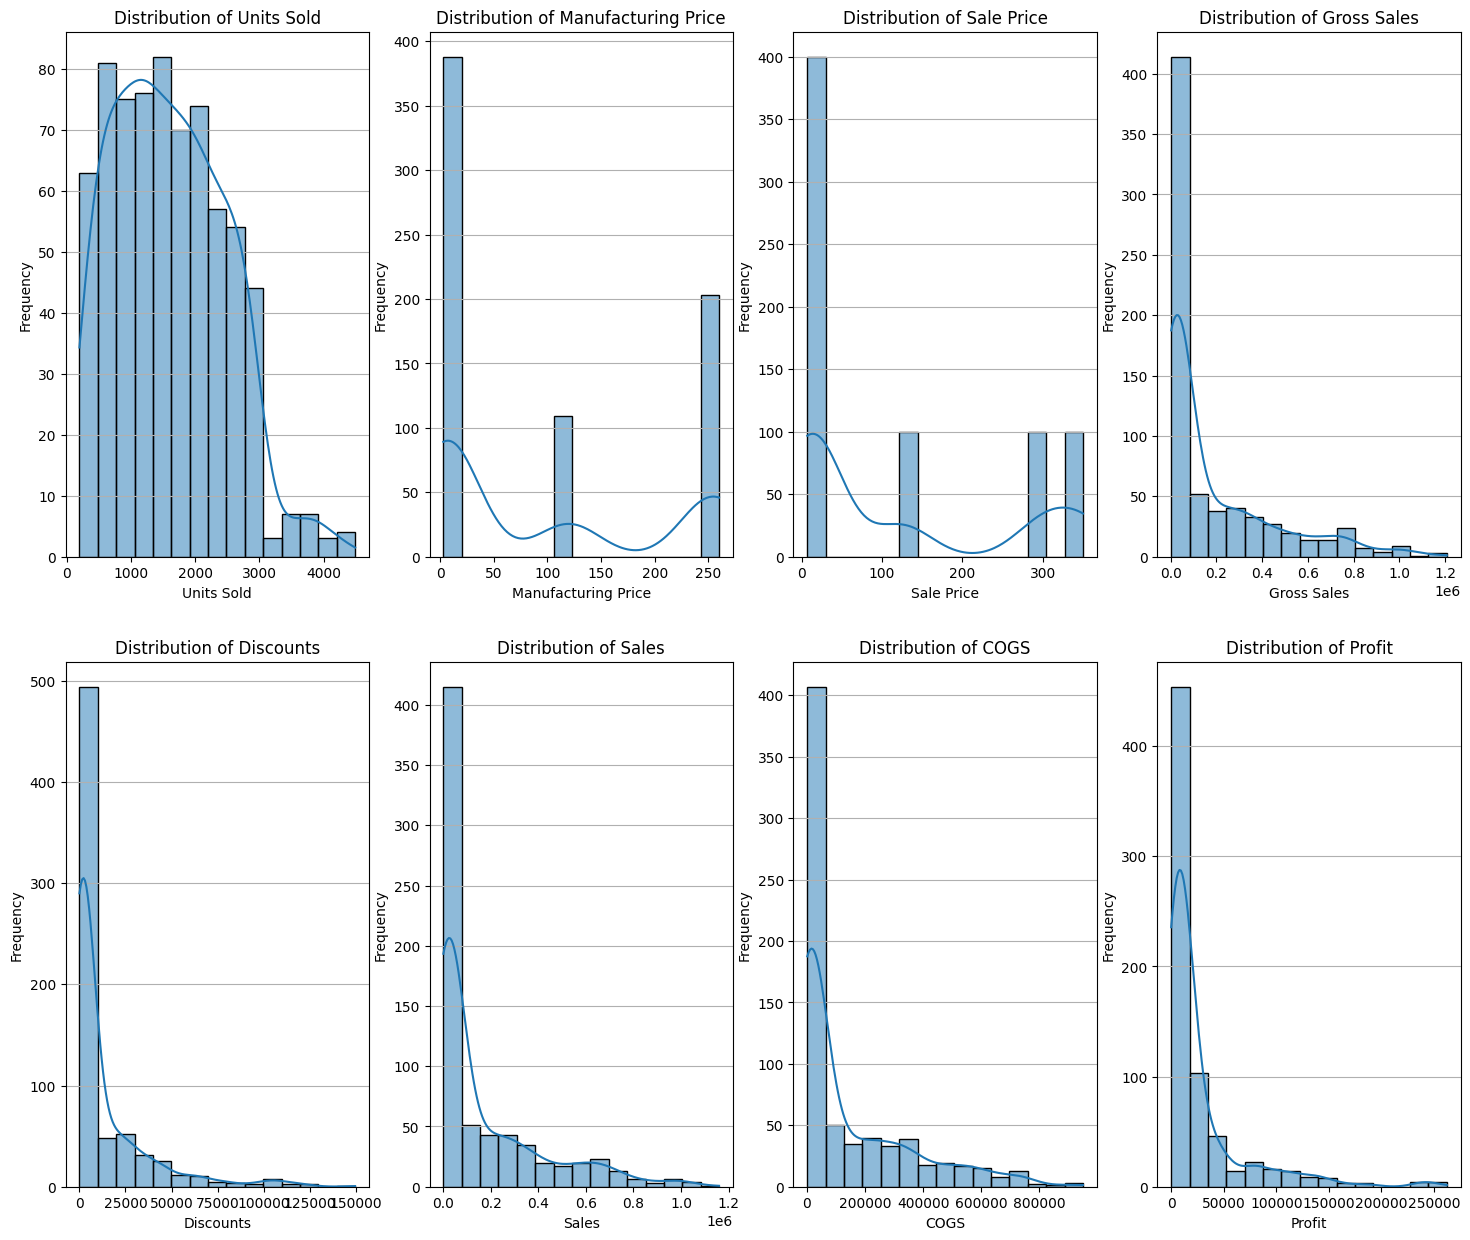

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(18, 15))
axes = axes.ravel()

# histogram and distribution of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=15, ax=axes[i])  # Specifica l'asse
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

- geographical representation

In [18]:
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

In [19]:
df_country = df[["Country", "Profit"]]
df_map = df.groupby('Country', as_index=False)['Profit'].sum()

In [20]:
world = world.merge(df_map, left_on="NAME", right_on="Country", how="left")

In [21]:
world['Profit'] = world['Profit'].fillna(0)

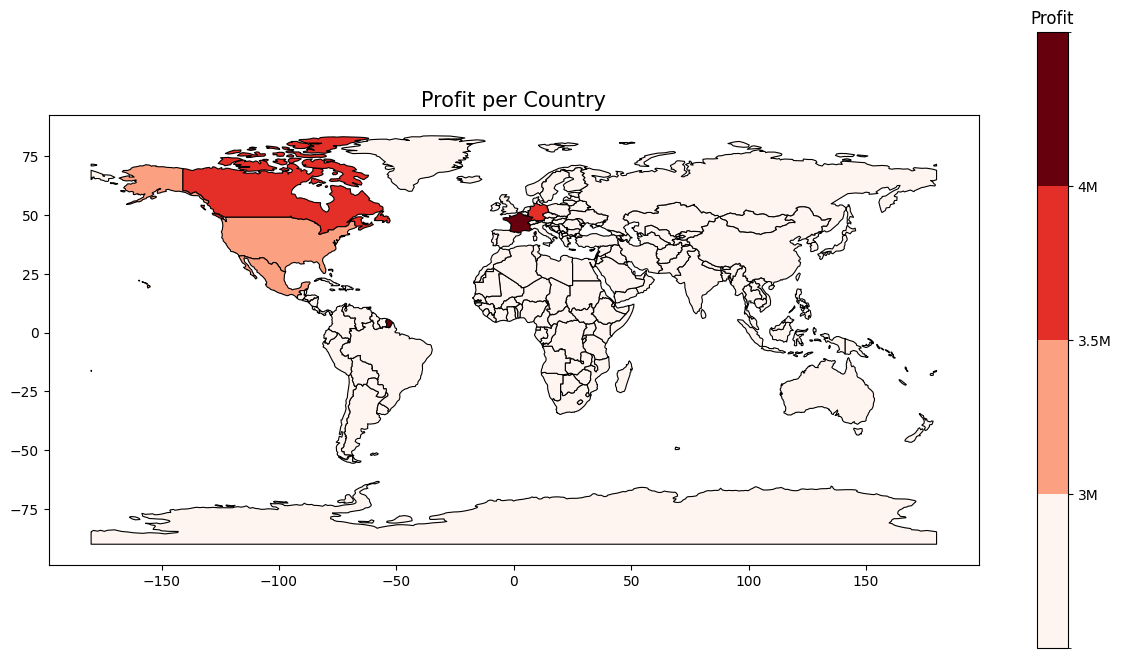

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

boundaries = [0, 3e6, 3.5e6, 4e6, world["Profit"].max()]
norm = mcolors.BoundaryNorm(boundaries, ncolors=256, clip=True)

plot = world.plot(column="Profit", cmap="Reds", linewidth=0.8, edgecolor="black", 
                  legend=True, ax=ax, norm=norm)


cbar = plot.get_figure().get_axes()[1]  
cbar.set_title("Profit", fontsize=12)
cbar.set_yticks([3e6, 3.5e6, 4e6])  
cbar.set_yticklabels(["3M", "3.5M", "4M"])

ax.set_title("Profit per Country", fontsize=15)

plt.show()

# 4. Statistical analysis

- Sales trends over time using a line chart to highlight seasonality or trends

In [23]:
df.index = pd.to_datetime(df.index)

In [24]:
monthly_sales = df.groupby(df.index.to_period('M'))['Sales'].sum()

In [25]:
fig = go.Figure()

# Add the sales data as a line plot
fig.add_trace(go.Scatter(
    x=monthly_sales.index.astype(str),
    y=monthly_sales.values,
    mode='lines+markers',
    name='Total Sales',
    line=dict(color='blue', width=2),
    marker=dict(size=8, color='blue', line=dict(width=1, color='black'))
))

fig.update_layout(
    title=dict(
        text="Sales Trends Over Time",
        font=dict(size=20),
        x=0.5,  # Center the title
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(
            text="Month",
            font=dict(size=16)
        ),
        tickangle=-45,
        showgrid=True,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(
            text="Total Sales",
            font=dict(size=16)
        ),
        showgrid=True,
        tickfont=dict(size=12)
    ),
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()

Positive peaks can be seen in the months of October, both in 2013 and 2014. The highest sales were recorded in October 2014, also December 2014 has a high number of sales but slightly lower than October.

- Sales difference across regions using a heat map or bar chart

In [26]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values()

In [27]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=country_sales.index,
    y=country_sales.values,
    marker=dict(
        color=country_sales.values,
        colorscale='RdYlGn',
        cmin=country_sales.values.min(),
        cmax=country_sales.values.max(),
        showscale=True
    ),
    name='Total Sales'
))

fig.update_layout(
    title=dict(
        text="Sales Difference Across Countries",
        font=dict(size=20),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(
            text="Country",
            font=dict(size=16)
        ),
        tickangle=-45,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(
            text="Total Sales",
            font=dict(size=16)
        ),
        tickfont=dict(size=12)
    ),
    template='plotly_white',
    width=1000,
    height=600
)

# Show the chart
fig.show()

The USA and Canada are the most attractive countries for sales, followed by the European market (France and Germany). Messico is the country with the least sales.

In [28]:
regional_sales = df.groupby(['Country', 'Segment'])['Sales'].sum().unstack()

In [29]:
fig = go.Figure(data=go.Heatmap(
    z=regional_sales.values,
    x=regional_sales.columns,
    y=regional_sales.index,
    colorscale=[[0, 'red'], [0.5, 'white'], [1, 'green']],
    text=regional_sales.values,
    texttemplate="%{text:,}",
    textfont=dict(size=12, color="black"),
    colorbar=dict(
        title=dict(
            text="Total Sales",
            font=dict(size=14, color="black")
        ),
        tickfont=dict(size=12, color="black"),
        thickness=20,
        len=0.5
    ),
    zmid=regional_sales.values.mean()
))

fig.update_layout(
    title=dict(
        text="Heatmap of Sales Difference Across Regions",
        font=dict(size=20, color="black"),
        x=0.5
    ),
    xaxis=dict(
        title=dict(
            text="Segment",
            font=dict(size=16, color="black")
        ),
        tickangle=45,
        tickfont=dict(size=12, color="black"),
        side="bottom"
    ),
    yaxis=dict(
        title=dict(
            text="Country",
            font=dict(size=16, color="black")
        ),
        tickfont=dict(size=12, color="black")
    ),
    template="plotly_white",
    width=1000,
    height=700,
    margin=dict(l=120, r=20, t=70, b=70)
)

fig.show()

Government and Small Business are the market segments that generate the most sales, regardless of the country. On the contrary, Channel Partners and Midmarket are the ones with the least sales.

- Top-selling products using visualization charts (pie chart or bar chart)

In [30]:
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

In [31]:
fig = go.Figure(data=[go.Pie(
    labels=df['Product'],
    values=df['Sales'],
    hoverinfo='label+percent',
    textinfo='percent+label',
    textfont_size=16,
    marker=dict(colors=px.colors.qualitative.Pastel, line=dict(color='white', width=2))
)])

fig.update_layout(
    title=dict(
        text="Top-Selling Products",
        font=dict(size=20),
        x=0.5
    ),
    template='plotly_white',
    showlegend=True,
    width=1000,
    height=800
)

fig.show()

The everyday bike, the Paseo, is the best-selling product. The other types of bicycles have a very similar market share, although the VTT (all-terrain bicycle) is slightly more sold than the others.

- Relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression

In [32]:
fig = px.scatter(
    df, 
    x='Discounts', 
    y='Sales', 
    color='Country', 
    title="Relationship Between Discounts and Sales",
    labels={"Discounts": "Discounts", "Sales": "Sales"},
    template="plotly_white"
)

fig.update_layout(
    title=dict(
        text="Relationship Between Discounts and Sales",
        font=dict(size=20),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(text="Discounts", font=dict(size=16)),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(text="Sales", font=dict(size=16)),
        tickfont=dict(size=12)
    ),
    legend=dict(
        title=dict(text="Country", font=dict(size=14)),
        font=dict(size=12)
    ),
    width=800,
    height=600
)

fig.show()

It seems to be an increasing and linear relationship between Discounts and Sales across all different geographic markets.

In [33]:
X = df[['Discounts']]
y = df['Sales']

In [34]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [35]:
df['Sales_Predicted'] = model.predict(X)

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Discounts'], 
    y=df['Sales'], 
    mode='markers', 
    name='Actual', 
    marker=dict(color='blue', size=6),
    hovertemplate="Discounts: %{x}<br>Sales: %{y}<extra></extra>"
))

fig.add_trace(go.Scatter(
    x=df['Discounts'], 
    y=df['Sales_Predicted'], 
    mode='lines', 
    name='Predicted', 
    line=dict(color='red', width=2),
    hovertemplate="Discounts: %{x}<br>Predicted Sales: %{y}<extra></extra>"
))

fig.update_layout(
    title=dict(
        text="Linear Regression: Discounts vs Sales",
        font=dict(size=20),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(text="Discounts", font=dict(size=16)),
        tickangle=-45,
        showgrid=True,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(text="Sales", font=dict(size=16)),
        showgrid=True,
        tickfont=dict(size=12)
    ),
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()

In [37]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     862.5
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          4.59e-124
Time:                        17:25:56   Log-Likelihood:                -9373.4
No. Observations:                 700   AIC:                         1.875e+04
Df Residuals:                     698   BIC:                         1.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.882e+04   6901.873      9.972      0.0

From the OLS regression it's confirmed a positive relation between Discount and Sales: with a unit increase in Discount, Sales on average increase by 7.67.

## 5. Correlation 

In [40]:
df_model = pd.get_dummies(df, columns=['Segment', 'Country', 'Product'], drop_first=True)

In [41]:
df_model = df_model.replace({' None ': None}, regex=True)
df_model['Discount Band'] = df_model['Discount Band'].str.strip()
df_model = pd.get_dummies(df_model, columns=['Discount Band'], drop_first=True)

In [42]:
correlation_matrix = df_model.corr()

In [44]:
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    title="Correlation Matrix Heatmap",
    aspect="auto"
)

fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=1000,
    height=1000,
)

fig.show()


It seems to be a very high correlation between Sales, Profit, COGS, Gorss Sales and Sale Price; it makes sense, because they are all metrics directly linked to a company's financial performance. 

Important to note, as mentioned before Discount and Sales present a high correlation.

For all the other variables, it seems not to be high correlation and so multicollinearity problem.

## 6. Predicitive model

#### Linear Regression

In [45]:
X = df_model.drop(columns=['Sales', 'Sales_Predicted', 'Gross Sales', 'COGS', 'Profit', 'Sale Price', 'Units Sold'])

y = df_model['Sales']

X_validation = X.iloc[-20:]
y_validation = y.iloc[-20:]

X_train = X.iloc[:-20]
y_train = y.iloc[:-20]

In [46]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr_model.predict(X_validation)
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=0.0, neginf=0.0)
X_train = np.nan_to_num(X_train.astype(float), nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train.astype(float), nan=0.0, posinf=0.0, neginf=0.0)
X_train[np.isinf(X_train)] = 0
y_train[np.isinf(y_train)] = 0
X_train_with_const = sm.add_constant(X_train)
X_train_with_const = np.array(X_train_with_const, dtype=float)
y_train = np.array(y_train, dtype=float)

In [48]:
ols_model = sm.OLS(y_train, X_train_with_const).fit()

In [49]:
feature_names = df_model.drop(columns=['Sales', 'Sales_Predicted', 'Gross Sales', 'COGS', 'Profit', 'Sale Price', 'Units Sold']).columns.tolist()

In [53]:
X_train = pd.DataFrame(X_train, columns=feature_names)

X_train_with_const = sm.add_constant(X_train)
X_train_with_const = pd.DataFrame(X_train_with_const, columns=["const"] + X_train.columns.tolist())

features = X_train_with_const.columns.tolist()

feature_mapping = {f"x{i}": feature for i, feature in enumerate(features[1:], start=1)}
feature_mapping["const"] = "const"

mapping_df = pd.DataFrame(list(feature_mapping.items()), columns=["Variable", "Feature"])

In [55]:
print(mapping_df)

   Variable                           Feature
0        x1               Manufacturing Price
1        x2                         Discounts
2        x3                Segment_Enterprise
3        x4                Segment_Government
4        x5                 Segment_Midmarket
5        x6            Segment_Small Business
6        x7                    Country_France
7        x8                   Country_Germany
8        x9                    Country_Mexico
9       x10  Country_United States of America
10      x11               Product_ Carretera 
11      x12                 Product_ Montana 
12      x13                   Product_ Paseo 
13      x14                     Product_ VTT 
14      x15                    Product_ Velo 
15      x16                 Discount Band_Low
16      x17              Discount Band_Medium
17    const                             const


In [52]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     81.01
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          5.49e-144
Time:                        17:35:41   Log-Likelihood:                -9013.3
No. Observations:                 680   AIC:                         1.806e+04
Df Residuals:                     663   BIC:                         1.814e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.239e+04    1.5e+04     -2.832      0.0

From the OLS summary, it can be noticed that the variables that most modify the average value of Sales are the Segment market, the Discount Band and the value of the Discount. While Country and Product are not relevant.

In [56]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, 21)), 
    y=y_validation.values, 
    mode='lines+markers', 
    name='Actual Sales',
    line=dict(color='blue'),
    marker=dict(color='blue', size=8)
))

fig.add_trace(go.Scatter(
    x=list(range(1, 21)), 
    y=y_pred, 
    mode='lines+markers', 
    name='Predicted Sales',
    line=dict(color='red'),
    marker=dict(color='red', size=8)
))

fig.update_layout(
    title="Linear Regression: Predicted vs Actual Sales",
    xaxis_title="Row Index (Last 20 Rows)",
    yaxis_title="Sales",
    legend_title="Legend",
    template="plotly_white",
    width=800,
    height=600,
    xaxis=dict(
        tickvals=[0, 5, 10, 15, 20],
        range=[0, 21]
    ),
    yaxis=dict(
        rangemode="tozero"
    )
)

fig.show()

#### Random Forest Regressor

In [57]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_validation)

mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 17754.516999999993
R-squared (R2): 0.9787302562089569


In [58]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                             Feature  Importance
1                          Discounts    0.743534
15                 Discount Band_Low    0.110595
16              Discount Band_Medium    0.025881
5             Segment_Small Business    0.020502
2                 Segment_Enterprise    0.020217
0                Manufacturing Price    0.015874
3                 Segment_Government    0.013818
9   Country_United States of America    0.012240
6                     Country_France    0.012198
7                    Country_Germany    0.005610
8                     Country_Mexico    0.004696
12                   Product_ Paseo     0.003798
13                     Product_ VTT     0.003192
11                 Product_ Montana     0.002658
14                    Product_ Velo     0.002127
4                  Segment_Midmarket    0.001615
10               Product_ Carretera     0.001444


In [859]:
fig = px.bar(
    importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importances (XGBoost)',
    labels={'Importance': 'Importance Score', 'Feature': 'Features'},
    template='plotly_white'
)

fig.update_layout(
    height=600,
    width=800,
    yaxis=dict(categoryorder='total ascending')
)

fig.show()

Again, it can be noticed how the presence of the Discount and the Segment of the market are the most important factor for Sales.

In [59]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, 21)),
    y=y_validation.values,
    mode='lines+markers',
    name='Actual Sales',
    marker=dict(symbol='circle', size=8)
))

fig.add_trace(go.Scatter(
    x=list(range(1, 21)),
    y=y_pred,
    mode='lines+markers',
    name='Predicted Sales',
    marker=dict(symbol='x', size=8)
))

fig.update_layout(
    title="Random Forest Regressor: Predicted vs. Actual Sales",
    xaxis_title="Row Index (Last 20 Rows)",
    yaxis_title="Sales",
    legend_title="Legend",
    template="plotly_white",
    width=800,
    height=600
)

fig.show()

The Random Forest Regression generates a better training prediction of the Sales, rather than the OLS method.

#### Gradient Boosting Model

In [60]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

In [61]:
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 12935.8798828125
R-squared (R2): 0.989905595779419


R2 is larger and MAE lower than the Random Forest values, it means that the Gradient Boosting model perfroms better on the trainig dataset

In [62]:
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Feature Importances:
                             Feature  Importance
15                 Discount Band_Low    0.363701
1                          Discounts    0.161720
5             Segment_Small Business    0.148718
2                 Segment_Enterprise    0.139717
16              Discount Band_Medium    0.072517
9   Country_United States of America    0.022919
3                 Segment_Government    0.019535
6                     Country_France    0.014537
7                    Country_Germany    0.012077
8                     Country_Mexico    0.010756
4                  Segment_Midmarket    0.008776
0                Manufacturing Price    0.007111
11                 Product_ Montana     0.006895
12                   Product_ Paseo     0.005620
14                    Product_ Velo     0.003149
13                     Product_ VTT     0.002253
10               Product_ Carretera     0.000000


In [63]:
fig = px.bar(
    importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importances (XGBoost)',
    labels={'Importance': 'Importance Score', 'Feature': 'Feature'},
    template='plotly_white'
)

fig.update_layout(
    height=600,
    width=800,
    yaxis=dict(categoryorder='total ascending')
)

fig.show()

In [64]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(y_validation) + 1)),
    y=y_validation,
    mode='lines+markers',
    name='Actual Sales',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

fig.add_trace(go.Scatter(
    x=list(range(1, len(y_pred) + 1)),
    y=y_pred,
    mode='lines+markers',
    name='Predicted Sales',
    line=dict(color='red'),
    marker=dict(symbol='x')
))

fig.update_layout(
    title='Predicted vs. Actual Sales',
    xaxis_title='Row Index (Last 20 Rows)',
    yaxis_title='Sales',
    legend_title='Legend',
    template='plotly_white',
    width=800,
    height=600
)

fig.show()

It can be easily noticed that the Gradient Boosting model performs a highly better training prediction of the Sales.

# 6. Conclusion

From the analyses performed in the previous sections, it can be noticed that sales showed significant fluctuations over time with the peak period coinciding with October, indicating the possibility of using seasonally based marketing campaigns and inventory optimization.

Certain market segments consistently outperformed others in terms of sales volume and profitability, highlighting the importance of segment-specific strategies, rather than geographical strategies.

It is noted that a group of products (Paseo and VTT) constitutes a huge fraction of revenue, meaning concentrating on them could improve profitability.
Further statistical analyses indicated a relationship between discount rates and sales volumes. However, excessive discounting negatively impacted overall profitability, emphasizing the need for a balanced pricing strategy.

Recommendations:
- Specific campaigns should be designed for high sales periods to maximize revenue.
- Increase production and promotion of top-selling bicycles (Paseo) and increase the selling in the two most important segments (Small Business and Government) to drive sustained growth.
- Implementing a discount strategy increases sales, but it is important to have a balance to avoid revenue dilution.
Therefore, through these insights the firm may reshape its business model to improve sales efficiency, and achieve sustained revenue growth in the competitive cycling market.
